<a href="https://colab.research.google.com/github/deepanshuMeteor/DFEData07/blob/main/BreastCancerAnalysis_ML_Hello_World_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/a-forty-two/cylons/master/data.csv', header=0 )

In [2]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.shape

(569, 33)

In [4]:
# cardinality and null values

# null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# cardinality - count of unique values in a column
for cname in data.columns:
  print(cname + " : " + str(data[cname].value_counts().count()))

id : 569
diagnosis : 2
radius_mean : 456
texture_mean : 479
perimeter_mean : 522
area_mean : 539
smoothness_mean : 474
compactness_mean : 537
concavity_mean : 537
concave points_mean : 542
symmetry_mean : 432
fractal_dimension_mean : 499
radius_se : 540
texture_se : 519
perimeter_se : 533
area_se : 528
smoothness_se : 547
compactness_se : 541
concavity_se : 533
concave points_se : 507
symmetry_se : 498
fractal_dimension_se : 545
radius_worst : 457
texture_worst : 511
perimeter_worst : 514
area_worst : 544
smoothness_worst : 411
compactness_worst : 529
concavity_worst : 539
concave points_worst : 492
symmetry_worst : 500
fractal_dimension_worst : 535
Unnamed: 32 : 0


In [6]:
# how many values do we have in Diagnosis column?
# LABEL COLUMN

data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

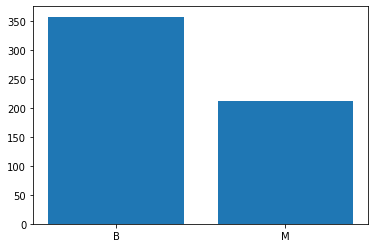

In [7]:
# distribution
import matplotlib.pyplot as plt
plt.figure()
m_and_b_counts = data['diagnosis'].value_counts()
plt.bar(m_and_b_counts.index,m_and_b_counts )
plt.show()

In [8]:
data.set_index('id', inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
# which columns to go for?
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [10]:
# for the sake of simplicity- let's pick only _mean value columns
x = data.iloc[:, 1:11]
y = data.loc[:, ['diagnosis']]
# from this, our objective is to form y = mx + c
# where m and x will be calc by ML
# y and x we will provide to algo!

In [ ]:
# NORMALIZE 
# Z-Score = (data-mean)/std (-3,3)
# MinMax -> (data-min)/(max-min) (0,1)

# let's use Z-Score

# We divide our data into TRAINING and TESTING
# the idea is that whatever values we pick for training should work for testing ALSO
# HENCE- mean and std will be calculated ONLY for training data
# same mean and std will also be used for testing data!

In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain,ytest = train_test_split(x, y, test_size=0.2)

# training > testing
# no unique situation in testing-> 

# label-> animal, bird, item, none
# training-> animal, bird, none 
# testing-> all 4



In [12]:
ytrain

,diagnosis
id,
9010018,M
894329,B
895299,B
8812818,B
922840,B
...,...
88199202,B
858970,B
883270,B


In [13]:
# mu and sigma (mean and std)
xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,455.0,14.015609,3.495556,6.98100,11.710000,13.17000,15.57000,27.42000
texture_mean,455.0,19.312505,4.277797,10.82000,16.170000,18.84000,21.79000,39.28000
perimeter_mean,455.0,91.213802,24.060370,43.79000,75.360000,85.42000,102.65000,186.90000
area_mean,455.0,644.064176,347.087007,143.50000,420.400000,537.30000,748.05000,2501.00000
smoothness_mean,455.0,0.096249,0.014402,0.05263,0.085345,0.09579,0.10540,0.16340
compactness_mean,455.0,0.104359,0.052115,0.01938,0.065635,0.09462,0.13050,0.34540
concavity_mean,455.0,0.087555,0.078580,0.00000,0.029320,0.06126,0.12505,0.42680
concave points_mean,455.0,0.047798,0.037948,0.00000,0.020335,0.03279,0.07002,0.20120
symmetry_mean,455.0,0.181277,0.027598,0.10600,0.161500,0.17940,0.19640,0.29060
fractal_dimension_mean,455.0,0.062988,0.007337,0.04996,0.057685,0.06161,0.06629,0.09744


In [14]:
stats = xtrain.describe().T
xmean = stats['mean'] 
xstd = stats['std']
xmean, xstd

(radius_mean                14.015609
 texture_mean               19.312505
 perimeter_mean             91.213802
 area_mean                 644.064176
 smoothness_mean             0.096249
 compactness_mean            0.104359
 concavity_mean              0.087555
 concave points_mean         0.047798
 symmetry_mean               0.181277
 fractal_dimension_mean      0.062988
 Name: mean, dtype: float64, radius_mean                 3.495556
 texture_mean                4.277797
 perimeter_mean             24.060370
 area_mean                 347.087007
 smoothness_mean             0.014402
 compactness_mean            0.052115
 concavity_mean              0.078580
 concave points_mean         0.037948
 symmetry_mean               0.027598
 fractal_dimension_mean      0.007337
 Name: std, dtype: float64)

In [15]:
norm_xtrain = (xtrain - xmean) /xstd
norm_xtest = (xtest - xmean)/ xstd

In [16]:
norm_xtest.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
86355,2.361396,0.083570,2.559653,2.491986,2.524017,3.308873,4.312115,3.544388,2.693036,1.008756
859465,-0.774014,-0.063702,-0.806879,-0.720177,-1.031695,-1.100434,-0.642218,-0.671936,-1.075341,-0.861143
842302,1.136984,-2.088109,1.312789,1.028376,1.538055,3.324224,2.704830,2.616796,2.196625,2.142689
894604,-1.077256,-0.732271,-1.026327,-0.921568,0.684017,0.129352,-0.258276,-0.214728,-0.252821,1.335852
88411702,-0.075985,1.042007,-0.111129,-0.155765,-1.098352,-0.696326,-0.516485,-0.641894,-0.144117,-1.185513


In [17]:
ytrain.head()

,diagnosis
id,
9010018,M
894329,B
895299,B
8812818,B
922840,B


In [18]:
# our Y is still M and B
# ML has no idea what M and B is
# but ML knows what 0 and 1 is!
# we intend to detect 'M' cancer - 1
# we can keep the 'B' cancer - 0
convert_diagnosis = lambda d : 1 if d=='M' else 0 

ytrain_encoded = ytrain['diagnosis'].map(convert_diagnosis)
ytest_encoded = ytest['diagnosis'].map(convert_diagnosis)

In [19]:
print(ytrain_encoded.tail(10))

id
862989      0
86135501    1
86973702    0
91805       0
9010872     0
88199202    0
858970      0
883270      0
859283      1
86730502    1
Name: diagnosis, dtype: int64


In [ ]:
# my x values are NORMALIZED
# my y values are INT and NO LONGER strings!
# DATA is ready for ML!

In [ ]:
# Define Algorithm
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# train
model.fit(norm_xtrain, ytrain_encoded)

# testing/scoring
predictions = model.predict(norm_xtest)

# evaluation
from sklearn.metrics import accuracy_score
accuracy_score(predictions, ytest_encoded)

0.9035087719298246

In [ ]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
# train
model2.fit(norm_xtrain, ytrain_encoded)

# testing/scoring
predictions = model2.predict(norm_xtest)

# evaluation
from sklearn.metrics import accuracy_score
accuracy_score(predictions, ytest_encoded)

0.9298245614035088

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
# HYPERPARAMETERS-> these are 2 diff HPs for Random Forest 
# SAME algo could also give 2 diff models!
ntree1, ntree2 = 50,100
for algo in [RandomForestClassifier(n_estimators=ntree1), RandomForestClassifier(n_estimators=ntree2), GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier(), LinearSVC()]:
  model = algo
  model.fit(norm_xtrain, ytrain_encoded)
  predictions = model.predict(norm_xtest)
  print(accuracy_score(predictions, ytest_encoded))

0.9298245614035088
0.9210526315789473
0.9298245614035088
0.9122807017543859
0.9736842105263158
0.9473684210526315


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
